Notes: <br>
* Money in 2020 USD

In [2]:
#PathProj = 'C:\\Users\\dkayanan\\Google Drive\\Projects\\Solar PV financial modelling'
PathProj = 'C:\\Users\\Dave\\GoogleDrive\\Projects\\Solar PV financial modelling'
from os import path
import sys 
sys.path.append(PathProj)

from PV_financial import *

**Note:** Steps 1-2 define parameters used in whole ntbk.
<h3><i><font color=#117A65>1) System size and investment costs</font></i></h3></font>

In [22]:
Sys_kW = 200
SysCost_breakdown = est_systemcosts(Sys_kW)
SysCost = SysCost_breakdown.sum()

display(SysCost_breakdown)
print('Total: {}'.format(SysCost))

PV panels              95880.0
inveter                16320.0
BOS (w/o inverter)     48960.0
installation labor     32640.0
other soft costs      177480.0
Name: USD 2020, dtype: float64

Total: 371280.0


Note: link the tax credit info here

In [23]:
tax_credit_perc = 26

InvCost = SysCost * (1-tax_credit_perc/100)
InvCost

274747.2

<h3><i><font color=#117A65>2) Cash flow parameters</font></i></h3></font>

In [24]:
# ---------------------------------------------------- a) Pricing
# cents/kWh
current_tariff = 15.57 
PPA_elec_price  = 13.50

# ---------------------------------------------------- b) Lease duration
L = 15

# ---------------------------------------------------- c) solar yield (kWh AC per yr)
# kWh_AC/kW_DC per year
solar_yield = 1666

# Degradation [%]
deg_early = 1
deg_cons = 0.5

# ---------------------------------------------------- d) Resale value
discount = 0.1
EndLease_resale = (1-tax_credit_perc/100) * calc_resale(L, Sys_kW, solar_yield, PPA_elec_price, useful_life=25, discount=discount, deg_early=deg_early, deg_cons=deg_cons)

print('Resale value % of investment costs: {:.2f}%'.format(EndLease_resale/InvCost*100))

Resale value % of investment costs: 73.81%


In [ ]:
#NPV_Lplus = calc_resale(L, Sys_kW, solar_yield, PPA_elec_price, useful_life=25, discount=discount, deg_early=deg_early, deg_cons=deg_cons)
#display(NPV_Lplus, InvCost)

In [25]:
cashflows, AnnualProduction_kWh = calc_cashflows(InvCost, Sys_kW, solar_yield, PPA_elec_price, L, EndLease_resale, deg_early, deg_cons)
cashflows

array([-274747.2 ,   44982.  ,   44532.18,   44307.27,   44082.36,
         43857.45,   43632.54,   43407.63,   43182.72,   42957.81,
         42732.9 ,   42507.99,   42283.08,   42058.17,   41833.26,
        244403.87])

In [ ]:
plot_cashflows_solaronly(cashflows, EndLease_resale, figsize=(8,3), save_as='Base - solar revenue.png')

In [ ]:
plot_cashflows_all(cashflows, EndLease_resale, figsize=(8,5), save_as='Base - all cash flows.png')

In [ ]:
#  Interest rate    Resale % of system cost
#  8%               79%
#  10%              73%
#  12%              69%

<h3><i><font color=#117A65>3) Feasibility metrics</font></i></h3></font>

In [26]:
npf.irr(cashflows)

0.15400670423654828

In [ ]:
display(npf.npv(0.1, cashflows), InvCost)

In [ ]:
# Payback
pd.Series(cashflows).cumsum()

In [ ]:
93534/434076

<h3><i><font color=#CB4335>4) PPA pricing</font></i></h3></font>

In [6]:
PPA_prices = (7.5, 22)

EndLease_resale = 0.75*InvCost

mark_tariffs = {
    '2006-2010': (13.61, 16.73),
    '2011-2017': (14.14, 21.78),
}

# ---------------------------------------------------------------------------
PPA_prices = np.linspace(*PPA_prices)
iir_vals = np.zeros_like(PPA_prices)

for idx, _price in enumerate(PPA_prices):
    cashflows, AnnualProduction_kWh = calc_cashflows(InvCost, Sys_kW, solar_yield, _price, L, EndLease_resale, deg_early, deg_cons)
    iir_vals[idx] = npf.irr(cashflows)

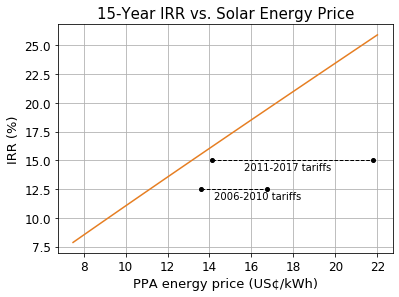

In [16]:
plot_Price_vs_irr(PPA_prices, iir_vals, grid=True, mark_tariffs=mark_tariffs, figsize=(6,4.2), xlabel='PPA energy price (US¢/kWh)',
                 title='{}-Year IRR vs. Solar Energy Price'.format(L), save_as='PPA pricing.png')

In [28]:
from scipy import stats

In [27]:
stats.linregress(PPA_prices, iir_vals)

LinregressResult(slope=0.01243474336674642, intercept=-0.013906797279516908, rvalue=0.9999864387756611, pvalue=2.876644145288827e-111, stderr=9.34727614388731e-06)

In [29]:
pd.DataFrame({
    'PPA price': PPA_prices,
    'IRR': iir_vals,
})

,PPA price,IRR
0,7.500000,0.078695
1,7.795918,0.082466
2,8.091837,0.086232
3,8.387755,0.089992
4,8.683673,0.093748
5,8.979592,0.097499
6,9.275510,0.101245
7,9.571429,0.104986
8,9.867347,0.108722
9,10.163265,0.112455


<h3><i><font color=#CB4335>4) Sensitivity: Investment costs</font></i></h3></font>

In [30]:
# Uses the ff. parameters defined above:
#    Sys_kW, tax_credit_perc
#    solar_yield, PPA_elec_price, L, deg_early, deg_cons

# ............................................................ a) Costs per USD
nom_syscost_USDperW = est_systemcosts(10**-3).sum()
nom_Invcost_USDperW = (1-tax_credit_perc/100)*nom_syscost_USDperW

# ............................................................ b) Set-up x-axis vector [Inv cost in USD/W]
_include = (0.95, 1, 1.1, 1.2)
pu_Invcosts = np.linspace(0.9, 1.2)

for val in _include:
    if val not in pu_Invcosts:
        pu_Invcosts = np.append(pu_Invcosts, val)
        
pu_Invcosts.sort()

vec_Invcosts_USDperW = np.append(pu_Invcosts*nom_Invcost_USDperW, nom_syscost_USDperW)
#                                nominal -10% to +20%             unsubsidized (+35% nominal)

# ............................................................ c) Vectors: Total investment, Resale, IRR init
vec_Invcosts_USD = Sys_kW * 10**3 * vec_Invcosts_USDperW
vec_Resale_USD = 0.75 * vec_Invcosts_USD

IRRs = np.zeros_like(vec_Invcosts_USD)

# ............................................................ d) Calculate cashflows & IRR
for idx, _InvCost_USD in enumerate(vec_Invcosts_USD):
    cashflows, AnnualProduction_kWh = calc_cashflows(_InvCost_USD, Sys_kW, solar_yield, PPA_elec_price, L, vec_Resale_USD[idx], deg_early, deg_cons)
    IRRs[idx] = npf.irr(cashflows)


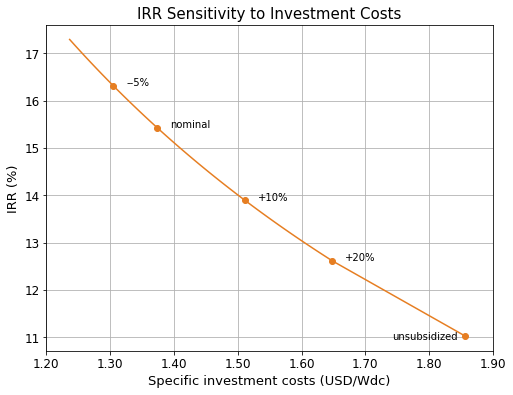

In [32]:
plot_InvCost_sensitivity(vec_Invcosts_USDperW, IRRs, pu_Invcosts, markitems = (-5, 0, 10, 20), save_as='Sensitivity to investment costs.png')

<h3><i><font color=#CB4335>Addtl Figures</font></i></h3></font>

In [ ]:
calc_annualprod

In [ ]:
calc_annualprod(25)

In [ ]:
calc_annualprod(25, deg_early=3)

In [ ]:
calc_annualprod(25, deg_cons=0.5)